In [1]:
%matplotlib inline
import tellurium as te
import numpy as np
import lmfit   # Fitting lib
import math
import random 
import matplotlib.pyplot as plt

In [10]:
rr = te.loada("""
     A -> B + C; k1*A
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.15
""")

timeToSimulate = 30
nDataPoints = 10

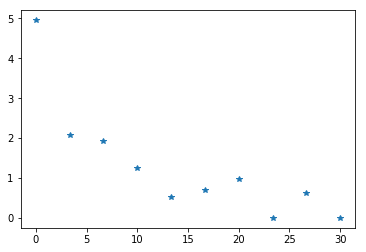

In [4]:
# Create the experimental data


# Create some 'experimental' data 
x_data = data[:, 0]
y_data = data[:,1]

for i in range (nDataPoints):
    y_data[i] = max(y_data[i] + np.random.normal (0, 0.5), 0) # standard deviation of noise

# Plot it to see what it looks like
plt.plot (x_data, y_data, marker='*', linestyle='None')
plt.show()


# Running a minimization
1. Define parameters present
1. Define python function that calculates residuals given parameter values
1. Construct the minimizer
1. Run the minimizer

In [5]:
# Define the parameters present
parameters = lmfit.Parameters()
parameters.add('k1', value=1, min=0, max=10)

In [6]:
# Define a python function that computes residuals from parameter values
def residuals(p):
    rr.reset()  
    pp = p.valuesdict()
    rr.k1 = pp['k1']
    data = rr.simulate (0, timeToSimulate, nDataPoints, ['A'])
    return (y_data - data[:,0]) 


In [7]:
# Create the minimizer
fitter = lmfit.Minimizer(residuals, parameters)

In [8]:
# Run the minimizer and examine the results
result = fitter.minimize (method='leastsq')
print (result.message)

# You can also print
print (result.chisqr)
print (result.params)


Fit succeeded.
1.9055626577816502
Parameters([('k1', <Parameter 'k1', value=0.15502919423785455 +/- 0.0206, bounds=[0:10]>)])


## Exercises
1. Run the fit 5 times and compute the standard deviation of the parameter estimate. How does it compare with the +/- values reported by the minimizer?
1. Add the reaction B -> C; k2\*B. Redo the fit.

In [9]:
import numpy as np
np.std([.169, .109, .139, .147, .162])

0.02097999046710937